<a href="https://colab.research.google.com/github/sadikinisaac/irisflower/blob/master/irisbootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris_Data.csv to Iris_Data.csv


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris_Data.csv']))

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


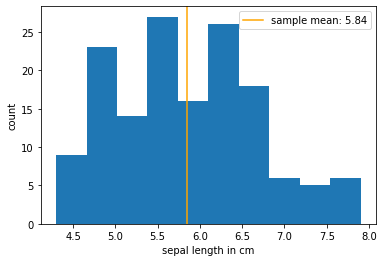

In [6]:
x = df['sepal_length'].values
x_mean = np.mean(x)
plt.hist(x, bins=10)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('sepal length in cm')
plt.ylabel('count')
plt.legend(loc=1)
plt.show()

In [7]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162275986


In [8]:
scipy.stats.sem(x)

0.0676113162275986

In [0]:
#Bootstrapping and estimating the population mean

In [0]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

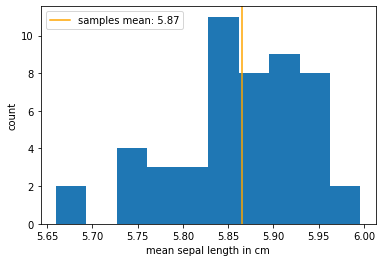

In [10]:
boot_50 = bootstrap_means(x, n_bootstrap_samples=50, seed=123)

boot_mean = np.mean(boot_50)
plt.hist(boot_50, bins=10)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

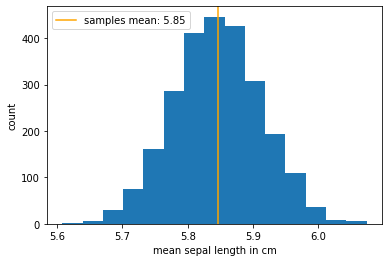

In [11]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

boot_mean = np.mean(boot_2500)
plt.hist(boot_2500, bins=15)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

In [0]:
#note: no matter how the sample is distributed, 
#the sample mean follows a normal distribution

In [12]:
np.std(boot_2500, ddof=1)

0.06666436312360136

In [0]:
# remember, the standard deviation of the bootstrap replicates (means) 
# estimates the standard error of the mean 
# (which estimates the standard deviation of the population mean)

In [13]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162275986


In [0]:
def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y

Text(0, 0.5, 'CDF')

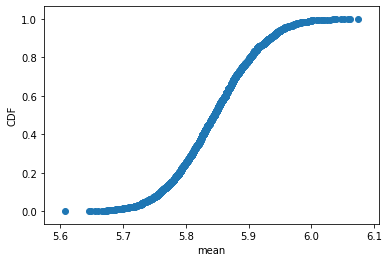

In [15]:
ecdf_x, ecdf_y = empirical_cdf(boot_2500)
plt.scatter(ecdf_x, ecdf_y)
plt.xlabel('mean')
plt.ylabel('CDF')

In [0]:
#Confidence Intervals

#95% confidence interval: 95% of the sample means 
#(if we would draw new samples / repeat the experiments) 
#would fall within the confidence interval

In [0]:
#From bootstrap replicates

In [16]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

lower, upper = np.percentile(boot_2500, [2.5, 97.5])

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.72, 5.98]


In [0]:
#From the original data (i.e., from a single sample)

In [17]:
def confidence_interval(x, ci=0.95):
    x_mean = np.mean(x)
    se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
    h = se * scipy.stats.t._ppf((1 + ci)/2. , x.shape[0])
    return x_mean - h, x_mean + h

lower, upper = confidence_interval(x, ci=0.95)


print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.71, 5.98]


In [18]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])

lower, upper = scipy.stats.norm.interval(alpha=0.95, 
                                         loc=np.mean(x), 
                                         scale=se)

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.71, 5.98]
